<a href="https://colab.research.google.com/github/brsanjay/ML-regressions-using-python/blob/main/simple-linear-regression/1-icecream-revenue/1-icecream-revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# STEP #1: LIBRARIES IMPORT

In [28]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #2: IMPORT DATASET

In [11]:
IceCream = pd.read_csv('IceCreamData.csv')

In [ ]:
# Visualize first five samples
IceCream.head(5)

In [13]:
# Visualize first 10 samples
IceCream.head(10)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518
7,30.833985,696.716640
8,0.976870,55.390338
9,31.669465,737.800824


In [14]:
# Visualize last five samples
IceCream.tail(5)

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [15]:
# Visualize last ten samples
IceCream.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [18]:
# Visualize entire dataset (Visualize only first few and last few data points)
IceCream

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [19]:
# Describe the dataset
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [20]:
# Get dataset info
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP #3: VISULAIZE DATASET

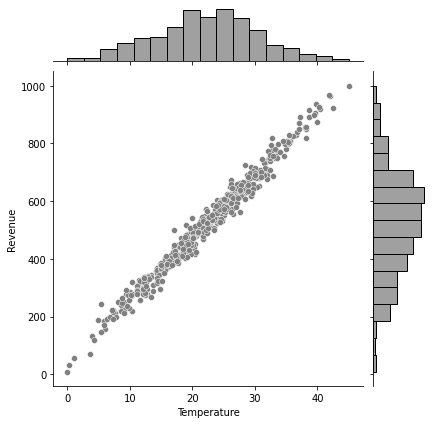

In [29]:
sns.jointplot(x='Temperature', y='Revenue', data=IceCream, color='gray')

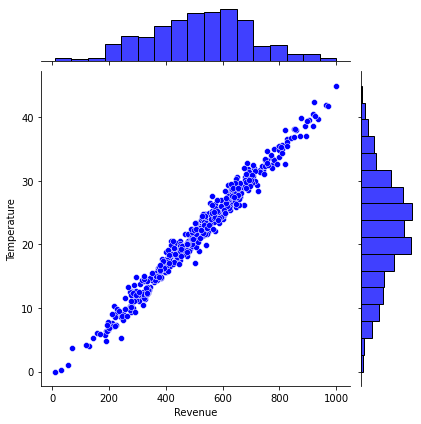

In [35]:
# plot x = Revenue, y = Temperature
sns.jointplot(x='Revenue', y='Temperature', data=IceCream, color='blue')

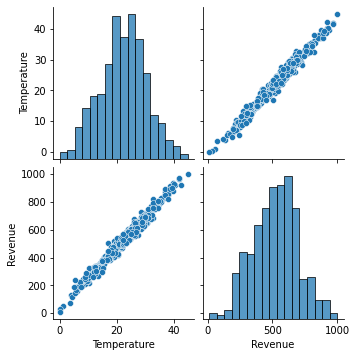

In [34]:
# Pair Plot
sns.pairplot(IceCream)

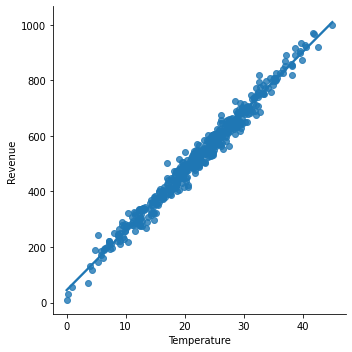

In [36]:
# plot best line across data points
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

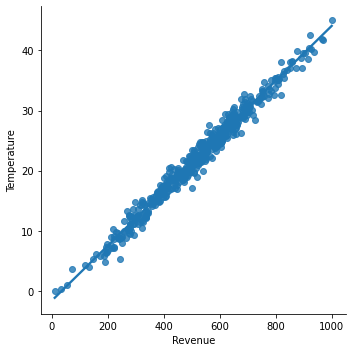

In [37]:
sns.lmplot(x='Revenue', y='Temperature', data=IceCream)

# STEP #4: CREATE TESTING AND TRAINING DATASET

In [39]:
# Divide data points into Testing and Training data sets
X = IceCream[['Temperature']]
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [40]:
Y = IceCream[['Revenue']]
Y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [41]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [50]:
x_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [51]:
x_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790101
438,17.132795


In [52]:
x_train.shape

(400, 1)

In [53]:
y_train.shape

(400, 1)

In [54]:
x_test.shape

(100, 1)

In [55]:
y_test.shape

(100, 1)

# STEP #5: TRAIN THE MODEL

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train, y_train)

LinearRegression()

In [63]:
print('Linear Model Coefficient (m)', regressor.coef_)
print('Linear Model Coefficient (b)', regressor.intercept_)

Linear Model Coefficient (m) [[21.38197386]]
Linear Model Coefficient (b) [46.80464128]


# STEP #6: TEST THE MODEL

In [65]:
x_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790101
438,17.132795


In [64]:
y_predict = regressor.predict(x_test)
y_predict

array([[681.93870622],
       [632.14474995],
       [559.64360486],
       [498.90609993],
       [615.45939165],
       [304.72417213],
       [285.79420948],
       [315.60842003],
       [506.26427154],
       [685.69744019],
       [723.96030494],
       [400.84625166],
       [431.61634142],
       [671.36600031],
       [ 52.51422053],
       [198.77682819],
       [523.08595488],
       [563.90495549],
       [583.83579144],
       [682.24517768],
       [556.2285085 ],
       [783.88766163],
       [655.44109362],
       [570.0735459 ],
       [912.21841974],
       [664.74778505],
       [315.96428407],
       [631.00983241],
       [731.1169322 ],
       [698.02984963],
       [435.08453949],
       [471.22058847],
       [710.29440571],
       [799.81874771],
       [641.02153776],
       [493.66044553],
       [744.9247237 ],
       [318.10831232],
       [262.69083171],
       [132.04437543],
       [582.55738268],
       [230.41054193],
       [547.29799783],
       [393

In [66]:
y_test

,Revenue
361,659.873287
73,623.248701
374,559.135869
155,497.752318
104,627.901841
...,...
347,564.310532
86,643.944327
75,653.986736
438,412.082357


Text(0.5, 1.0, 'Revenue Generated vs. Teamperatue @ Ice Cream Stand (Training Set)')

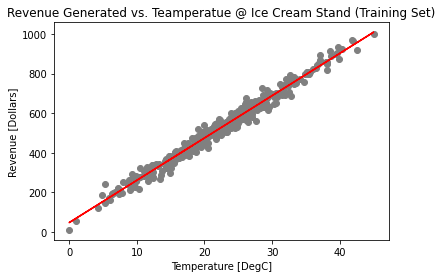

In [69]:
plt.scatter(x_train, y_train, color='gray')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperatue @ Ice Cream Stand (Training Set)')

Text(0.5, 1.0, 'Revenue Generated vs. Teamperatue @ Ice Cream Stand (Testing Set)')

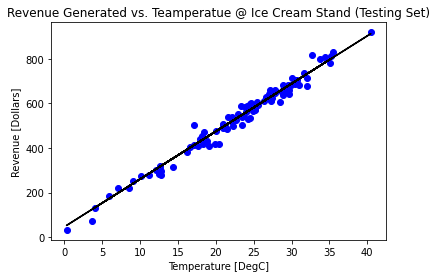

In [70]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, regressor.predict(x_test), color='black')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Teamperatue @ Ice Cream Stand (Testing Set)')

In [75]:
# Revenue predictions
T = np.array([[40]])
revenue = regressor.predict(T)
revenue

c:\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[902.08359549]])